# Exploratory Data Analysis

## Librerias

In [28]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud,STOPWORDS
import re


warnings.filterwarnings('ignore')

## Leer Datos

In [29]:
df = pd.read_excel('dataset_2023.xlsx')
df["Descripcion"] = df["Descripcion"].fillna("")
df.shape

(46367, 18)

In [30]:
def limpiar_texto(texto):
    texto = texto.upper()
    texto = re.findall(r"[A-Z0-9]{3,}", texto)
    texto = " ".join(texto).strip()
    return texto

df["Descripcion"] = df["Descripcion"].apply(limpiar_texto)

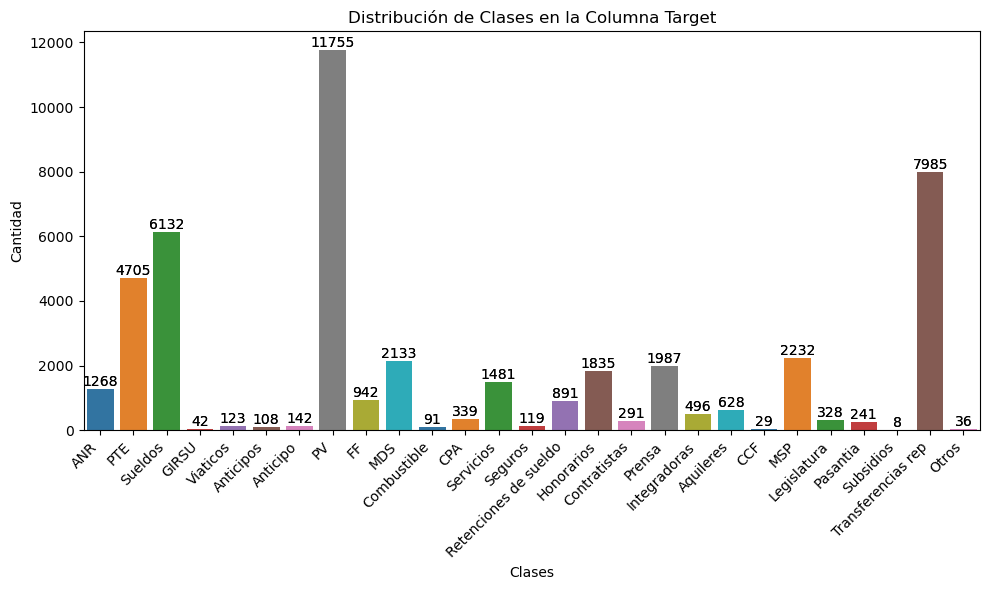

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Class', data=df)
# Add color for each category
colors = sns.color_palette("tab10")
ax = sns.countplot(x='Class', data=df, palette=colors)

plt.title('Distribución de Clases en la Columna Target')
plt.xlabel('Clases')
plt.ylabel('Cantidad')

# Añadir etiquetas de cantidad sobre cada barra
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### WordCloud

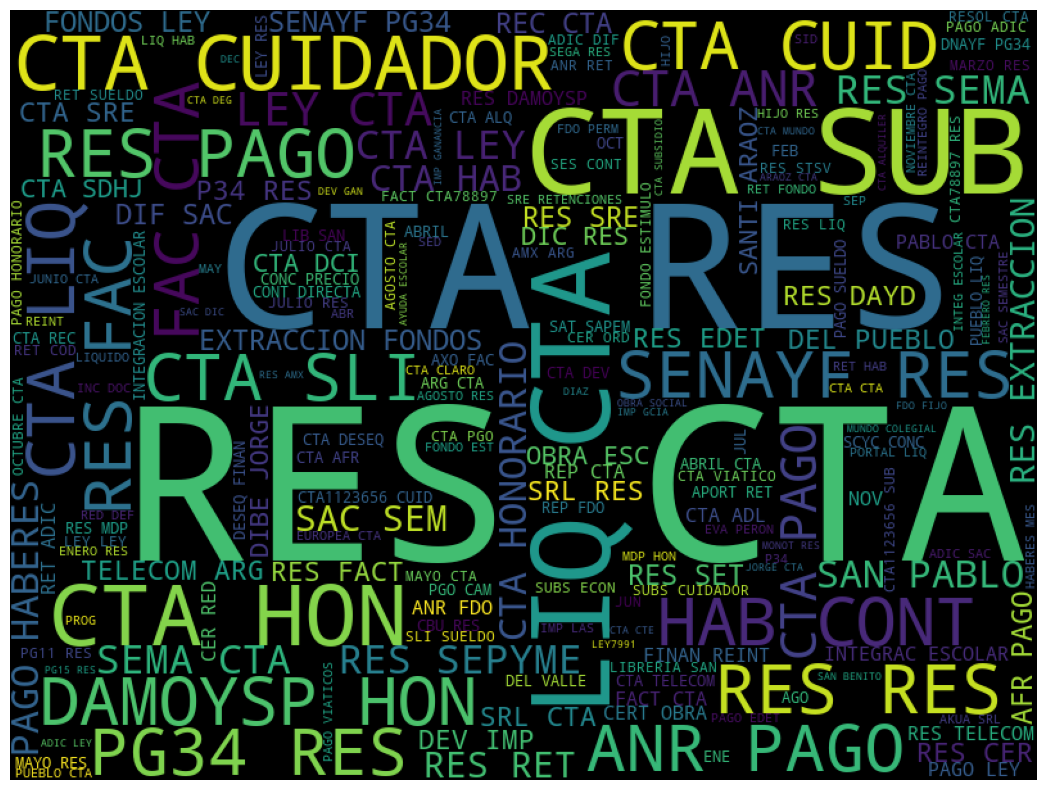

In [32]:
wc = WordCloud(' '.join(df['Descripcion']))
def cloud(data, backgroundcolor = 'black', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df['Descripcion']))

#### Longitud de descripciones

In [33]:
def get_longitud_text(text):
  return len(text)

df['Description_length'] = df['Descripcion'].apply(get_longitud_text)
df['Description_length'].describe()

count    46367.000000
mean        41.789980
std          8.437751
min          0.000000
25%         36.000000
50%         43.000000
75%         48.000000
max         60.000000
Name: Description_length, dtype: float64

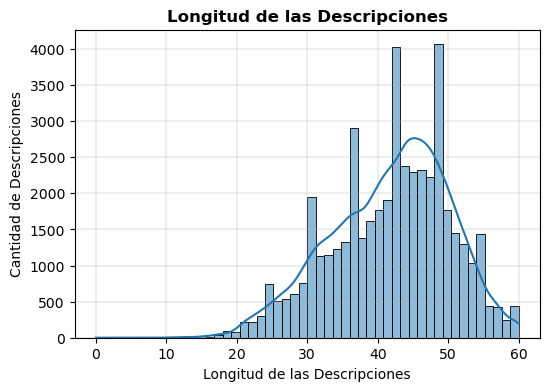

In [34]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Description_length'], kde=True, bins=50)
plt.title('Longitud de las Descripciones', fontdict={'fontsize': 12,'fontweight':'bold'})
plt.ylabel('Cantidad de Descripciones')
plt.xlabel('Longitud de las Descripciones')
plt.grid(linewidth=0.3)
plt.show()

#### Frecuencia de palabras según target

Clase: ANR
[('anr', 779), ('2023', 607), ('cta', 525), ('pago', 237), ('ret', 232), ('fdos', 154), ('fdi', 126), ('aporte', 121), ('obras', 118), ('cod', 117)]


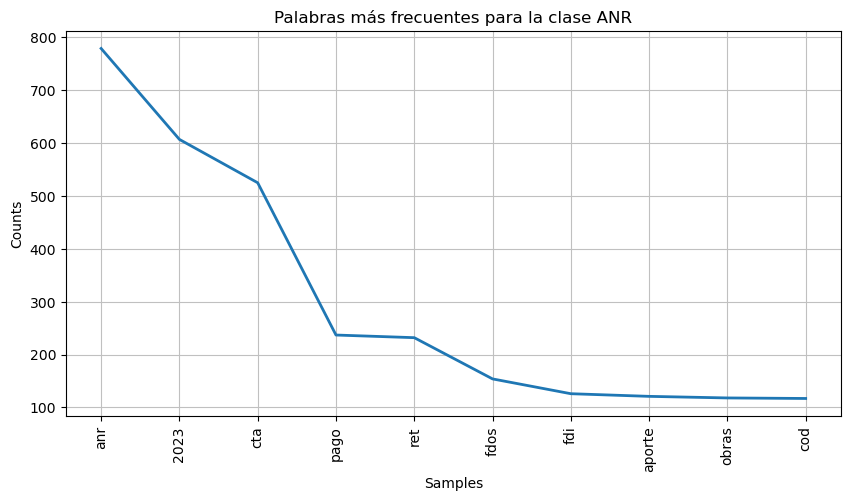

Clase: PTE
[('res', 2869), ('cta', 1642), ('sre', 794), ('edet', 764), ('ret', 652), ('2023', 647), ('liq', 608), ('sac', 393), ('pago', 324), ('set', 274)]


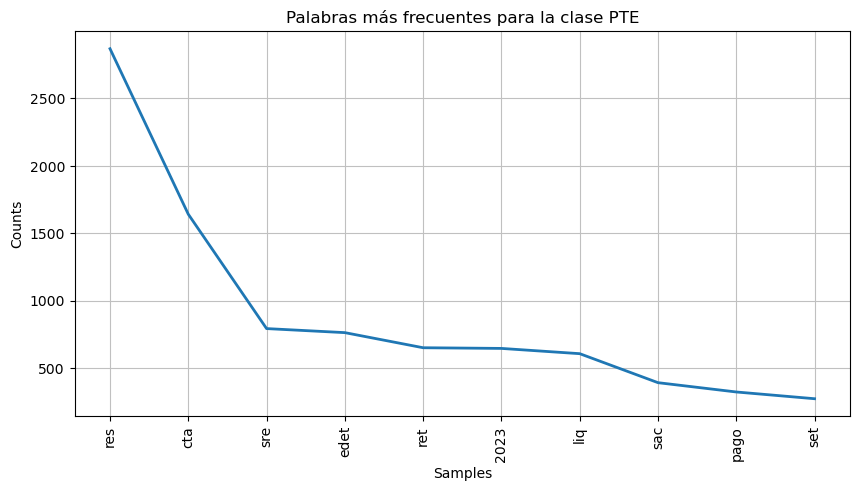

Clase: Sueldos
[('cta', 3251), ('res', 3015), ('ley', 1543), ('2023', 1376), ('7991', 1103), ('pago', 1017), ('sli', 965), ('adic', 829), ('haberes', 637), ('sac', 567)]


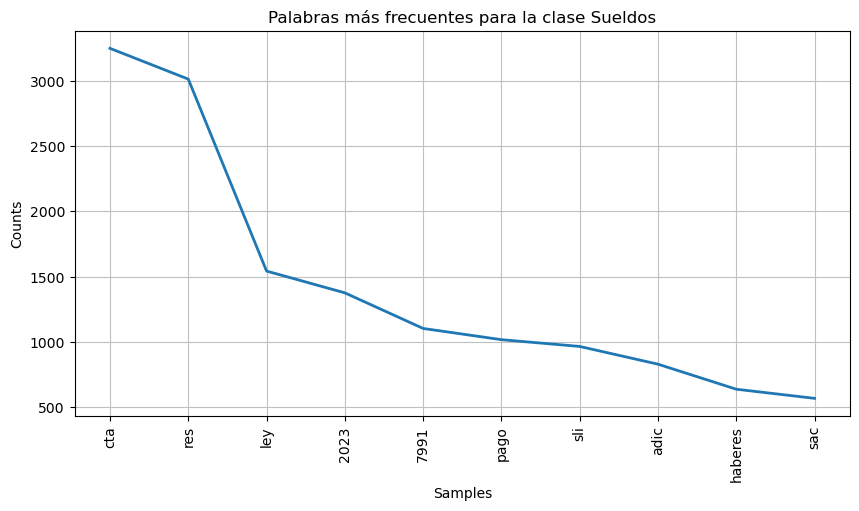

Clase: GIRSU
[('girsu', 42), ('pago', 41), ('afr', 40), ('2023', 19), ('cta', 18), ('servicio', 16), ('2022', 11), ('200981615', 10), ('200982175', 8), ('200981776', 7)]


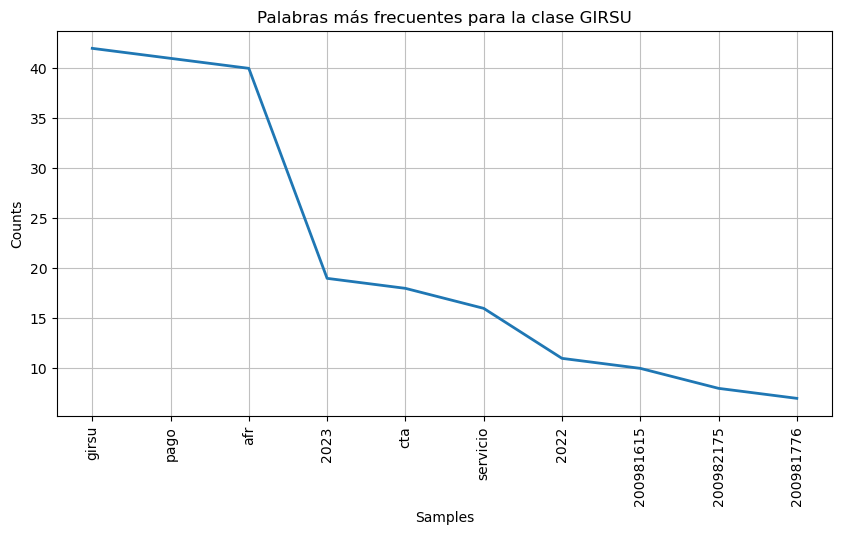

Clase: Viaticos
[('viaticos', 80), ('cta', 66), ('res', 61), ('anticipo', 49), ('ant', 46), ('viat', 25), ('pasajes', 20), ('antic', 9), ('viatico', 8), ('pasaj', 8)]


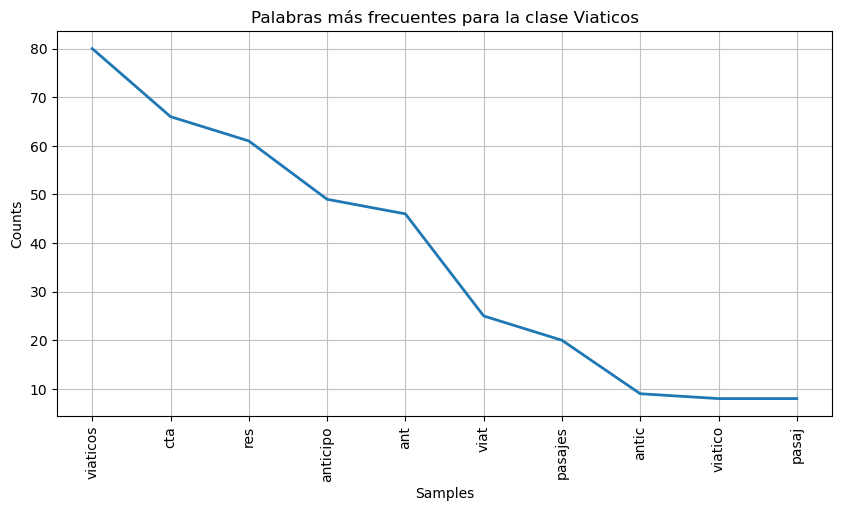

Clase: Anticipos
[('ant', 70), ('cta', 51), ('res', 46), ('gtos', 22), ('ent', 21), ('dcg', 13), ('cc360000200977803', 13), ('36000020097223', 13), ('360000200972235', 12), ('cocina', 9)]


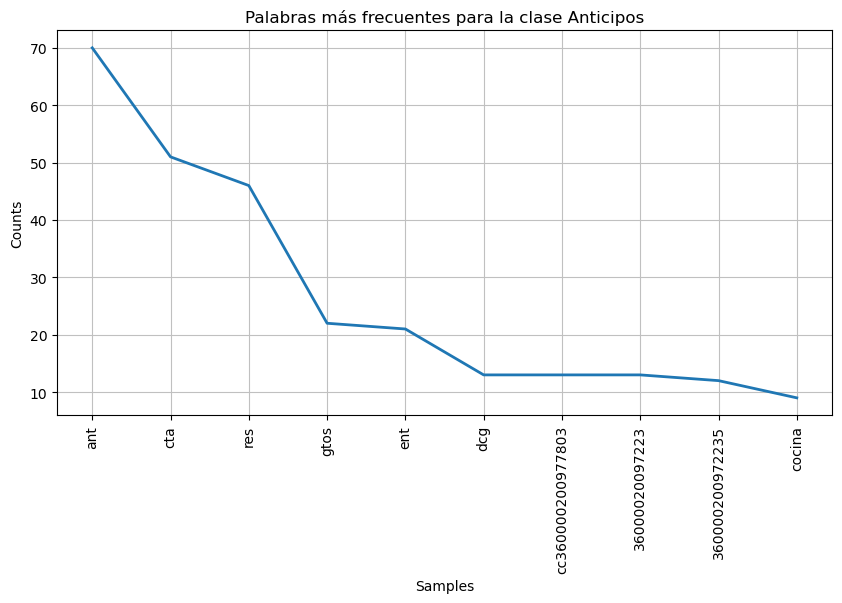

Clase: Anticipo
[('anticipo', 97), ('res', 75), ('cta', 73), ('antic', 32), ('fdos', 16), ('9420597581', 15), ('cer', 15), ('cesa', 15), ('cortesia', 10), ('homenaje', 10)]


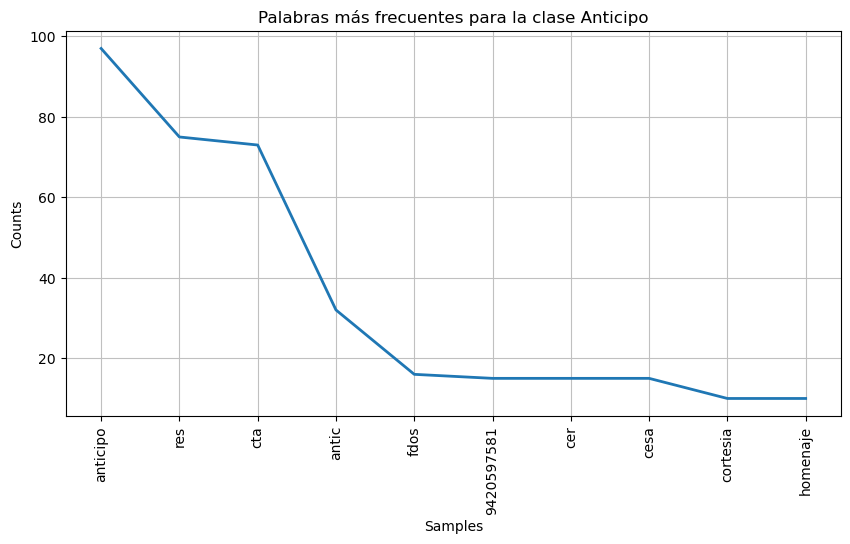

Clase: PV
[('res', 6578), ('cta', 5852), ('fac', 1109), ('cont', 800), ('hon', 795), ('damoysp', 769), ('pago', 628), ('hab', 625), ('srl', 544), ('pablo', 421)]


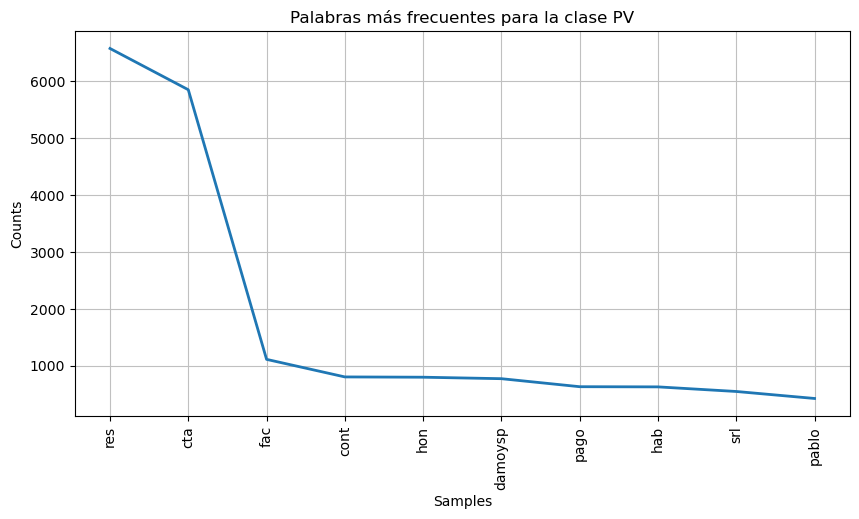

Clase: FF
[('res', 574), ('cta', 530), ('rep', 406), ('fdo', 401), ('comb', 167), ('fijo', 149), ('prog', 125), ('perm', 120), ('func', 108), ('reposicion', 91)]


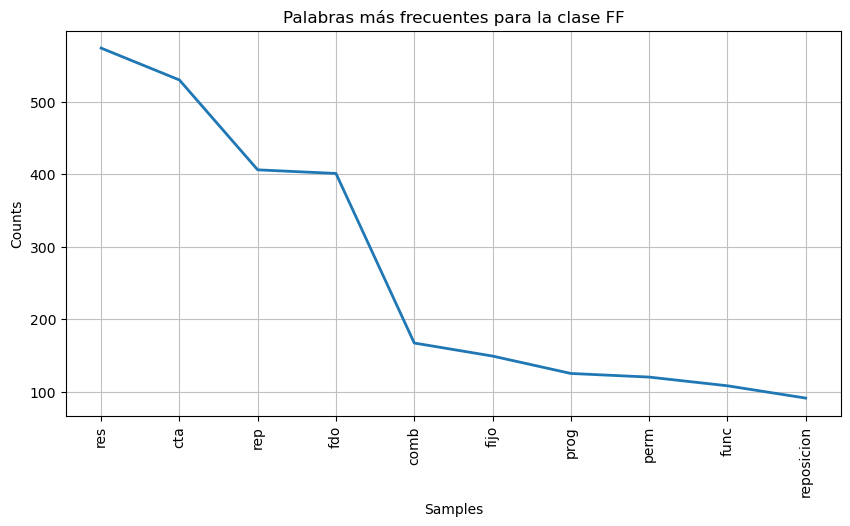

Clase: MDS
[('cta', 1638), ('res', 1616), ('srl', 410), ('mundo', 95), ('pg34', 94), ('asfoura', 87), ('2749343', 86), ('colegial', 85), ('9419720327', 82), ('perez', 76)]


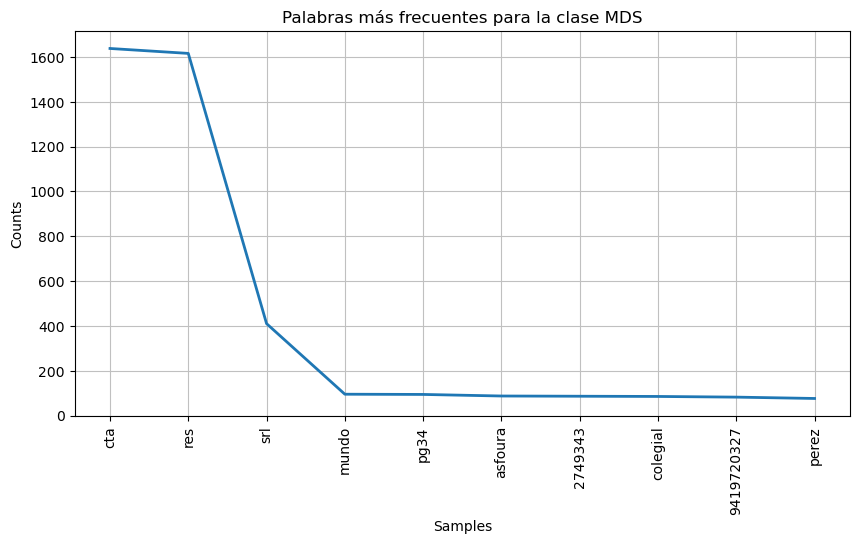

Clase: Combustible
[('combustible', 80), ('dcg', 79), ('res', 25), ('cc360000002344074', 17), ('noviembre', 12), ('cc360000002606053', 12), ('dic', 12), ('marzo', 10), ('octubre', 9), ('ene', 9)]


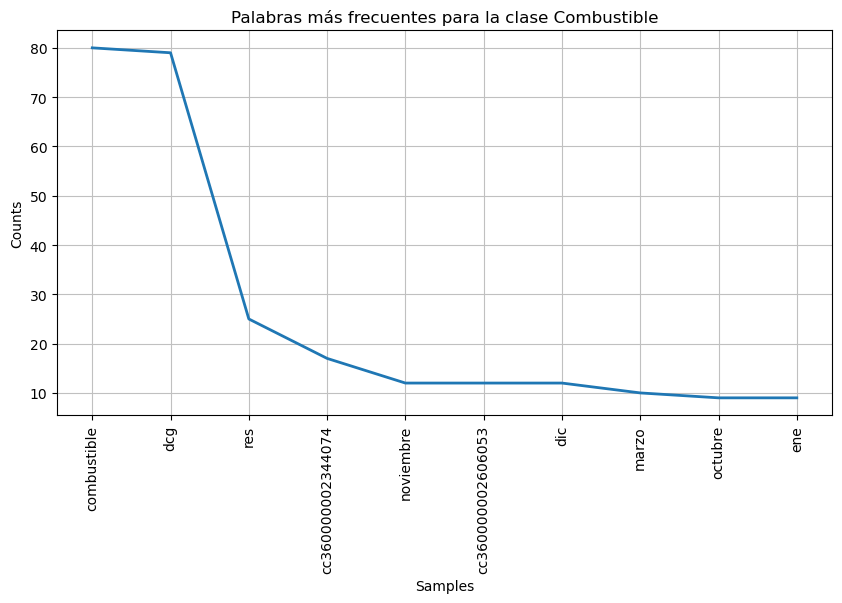

Clase: CPA
[('cta', 179), ('360000002586535', 156), ('res', 134), ('360000200973153', 101), ('prog', 76), ('soc', 60), ('com', 59), ('org', 58), ('ret', 36), ('art', 33)]


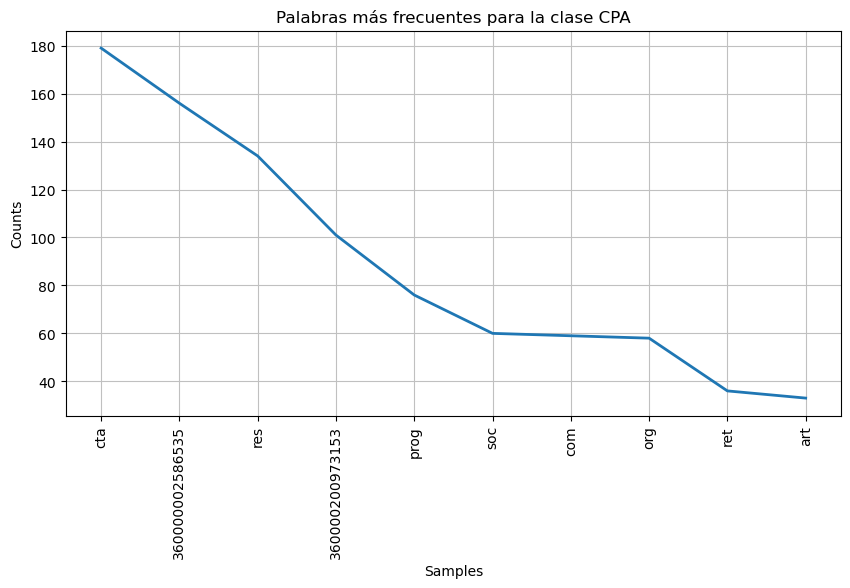

Clase: Servicios
[('res', 883), ('cta', 785), ('telecom', 604), ('360000100735410', 441), ('arg', 268), ('internet', 213), ('sat', 184), ('pago', 155), ('serv', 124), ('fact', 115)]


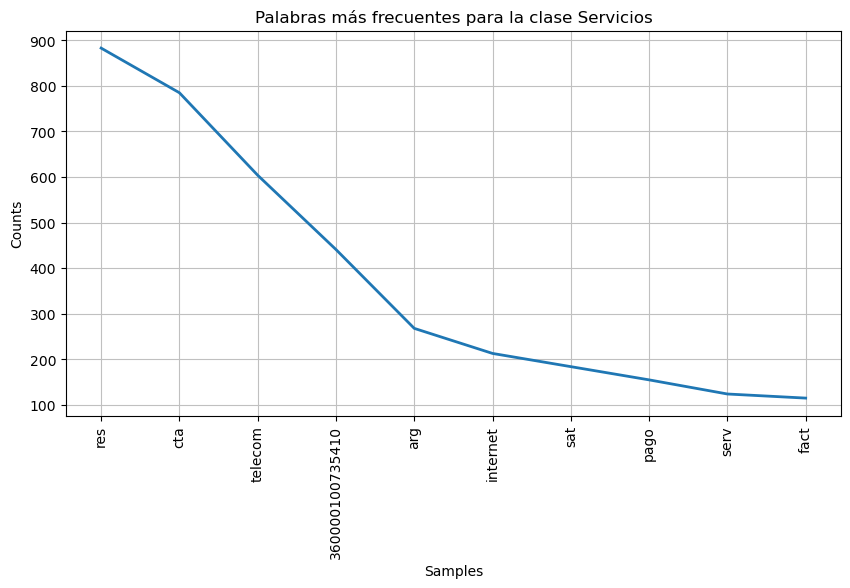

Clase: Seguros
[('res', 72), ('cta', 59), ('seg', 46), ('360000200973139', 45), ('poliza', 41), ('caja', 25), ('pol', 21), ('seguro', 19), ('pago', 16), ('pop', 12)]


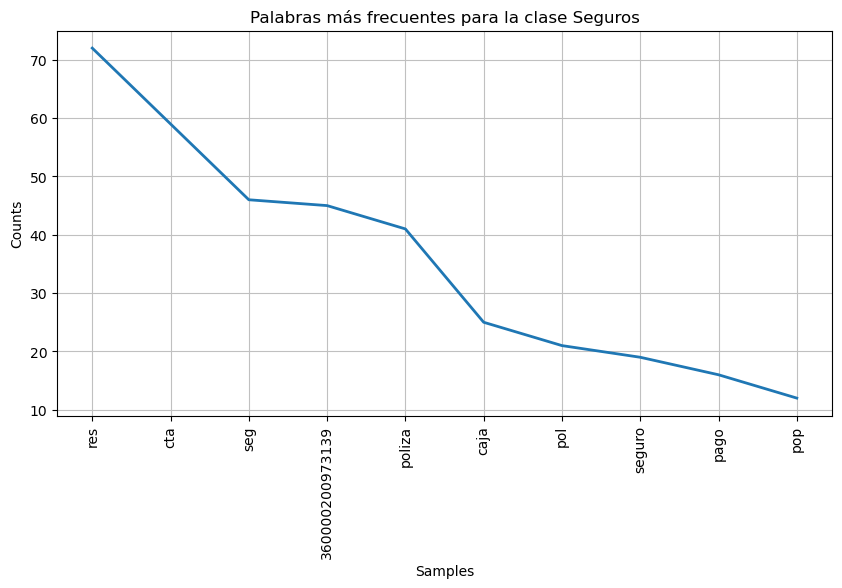

Clase: Retenciones de sueldo
[('res', 504), ('ret', 374), ('cta', 235), ('sre', 209), ('2023', 189), ('adic', 147), ('fondo', 127), ('liq', 79), ('retenciones', 78), ('estimulo', 78)]


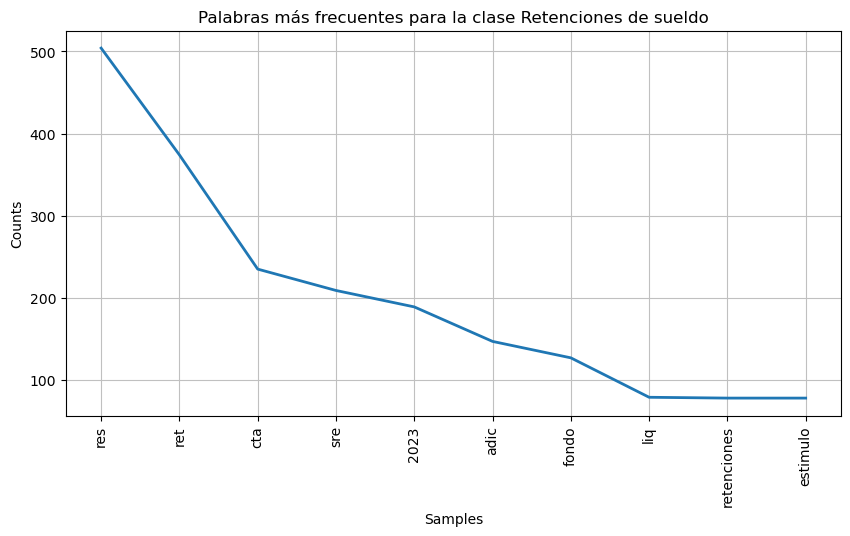

Clase: Honorarios
[('cta', 1608), ('res', 1550), ('hon', 1219), ('honorario', 322), ('honorarios', 246), ('hijo', 152), ('pago', 121), ('p11', 76), ('p02', 68), ('semgyd', 67)]


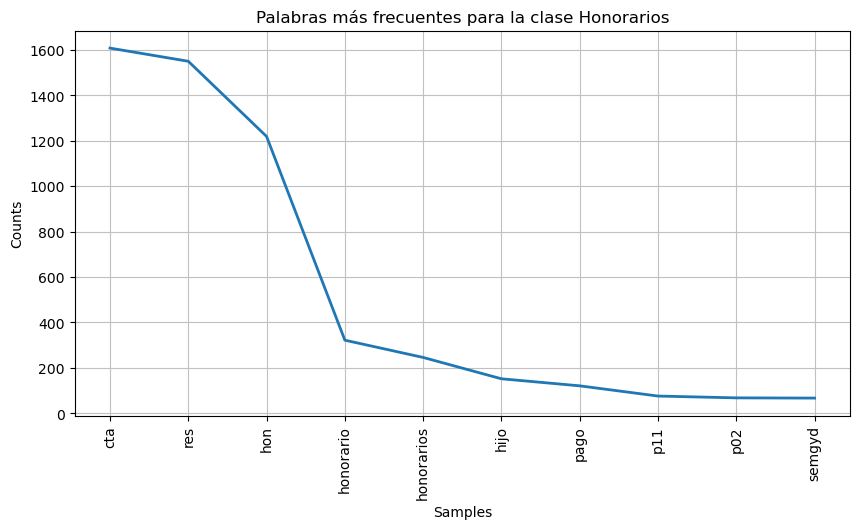

Clase: Contratistas
[('esc', 231), ('obra', 185), ('cert', 149), ('prov', 53), ('sec', 43), ('adec', 35), ('paz', 30), ('360000100735595', 27), ('frias', 26), ('los', 25)]


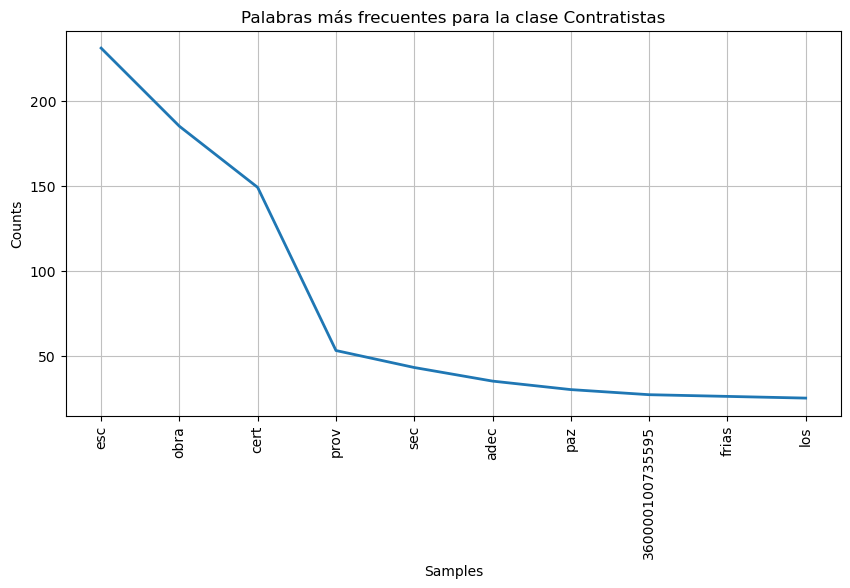

Clase: Prensa
[('res', 437), ('cta', 363), ('srl', 183), ('sas', 47), ('suarez', 37), ('132097', 35), ('fac', 34), ('abregu', 32), ('gaceta', 31), ('10073382', 30)]


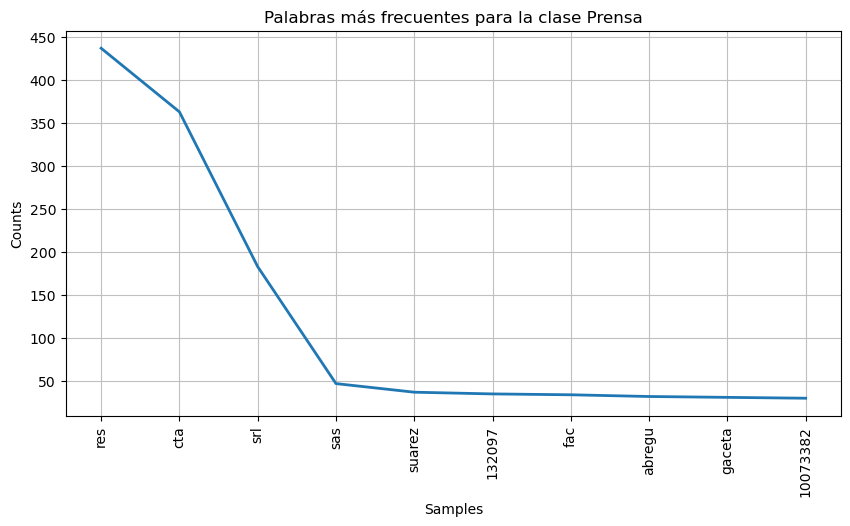

Clase: Integradoras
[('escolar', 457), ('cbu', 327), ('integrac', 202), ('integracion', 155), ('integ', 117), ('dic', 76), ('ago', 59), ('feb', 56), ('jul', 49), ('nov', 47)]


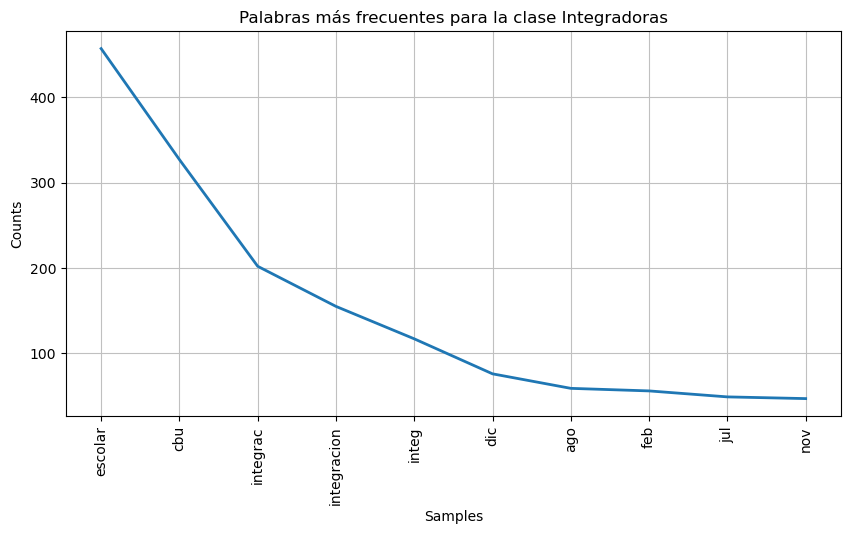

Clase: Aquileres
[('alq', 384), ('cta', 278), ('res', 218), ('alquiler', 208), ('local', 86), ('vehic', 38), ('2023', 36), ('junin', 34), ('damoysp', 26), ('pago', 24)]


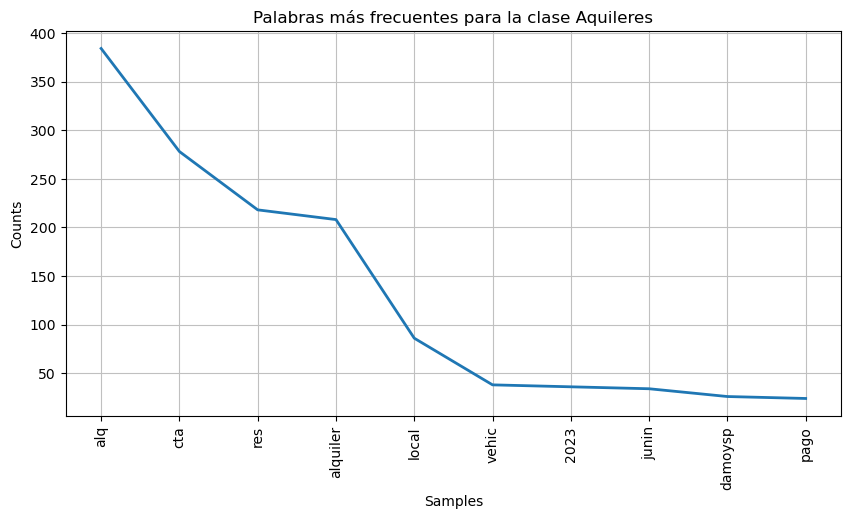

Clase: CCF
[('97091', 25), ('8561', 23), ('cargo', 18), ('sat', 16), ('sapem', 16), ('ley', 15), ('cta', 11), ('infraest', 10), ('res', 9), ('fiscal', 8)]


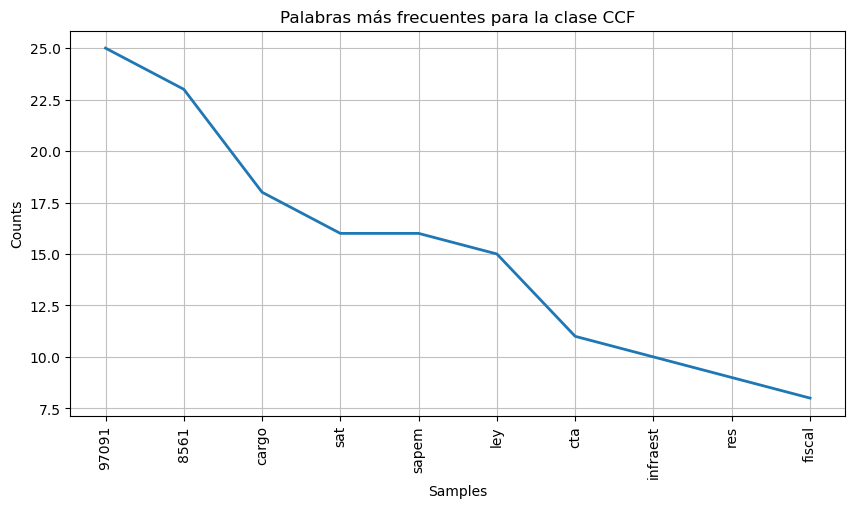

Clase: MSP
[('cta', 2191), ('res', 2121), ('liq', 1854), ('rec', 332), ('del', 222), ('360000001001729', 172), ('pueblo', 171), ('360000003846791', 104), ('360000100751069', 103), ('360009419743209', 94)]


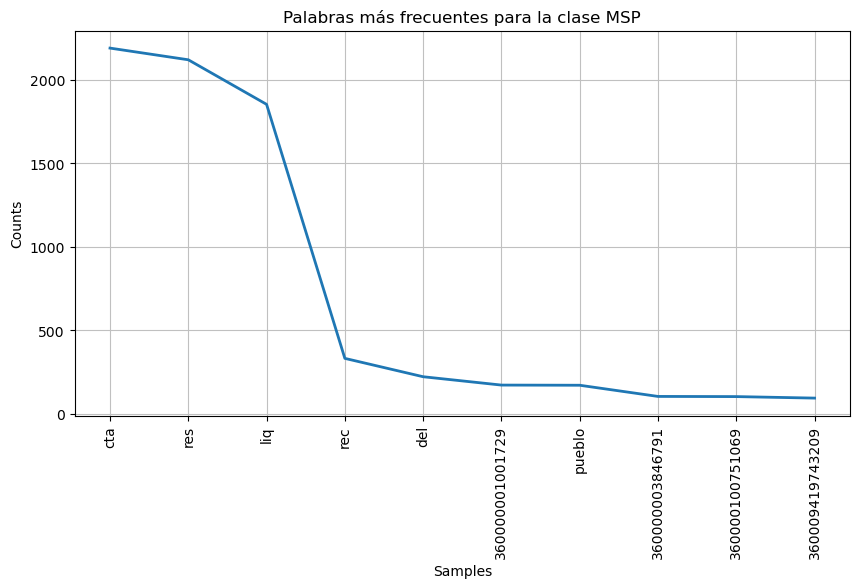

Clase: Legislatura
[('cta', 328), ('res', 323), ('extraccion', 315), ('fondos', 315), ('ley', 315), ('6930', 315), ('98043', 315), ('2023', 13), ('fdos', 13), ('98041', 13)]


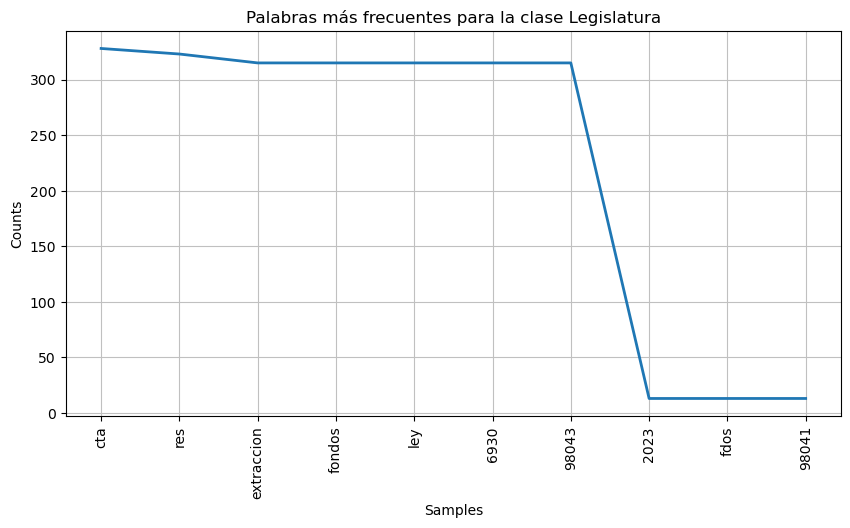

Clase: Pasantia
[('res', 136), ('art', 119), ('cta', 96), ('pasantia', 78), ('pasantes', 76), ('pago', 54), ('360000200971003', 50), ('360000200983024', 50), ('2023', 46), ('pasantias', 43)]


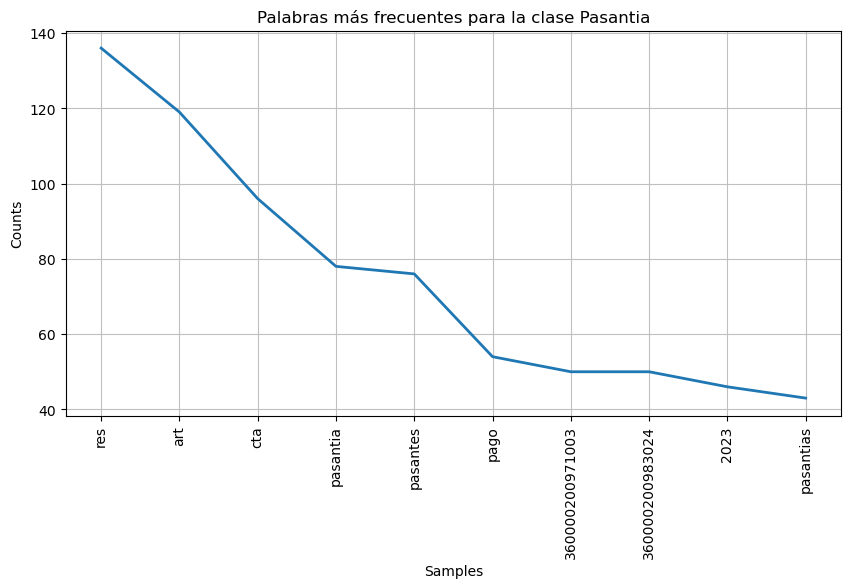

Clase: Subsidios
[('subs', 6), ('360000002586535', 5), ('tuc', 3), ('cta', 2), ('360000200973153', 2), ('pol', 2), ('ret', 2), ('res01', 1), ('sid', 1), ('subsidio', 1)]


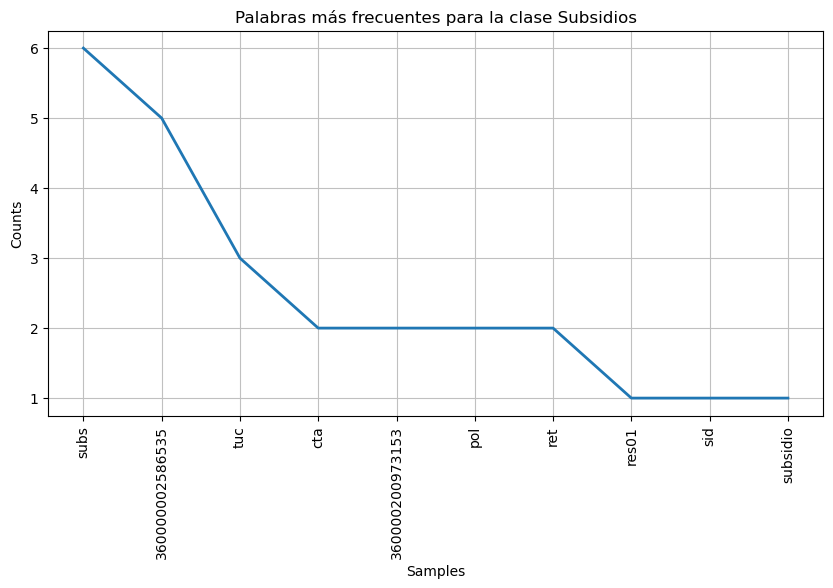

Clase: Transferencias rep
[('res', 6206), ('cta', 5950), ('1123656', 3506), ('sub', 1289), ('subs', 1231), ('cuidador', 993), ('cuid', 874), ('senayf', 858), ('pg34', 594), ('reint', 504)]


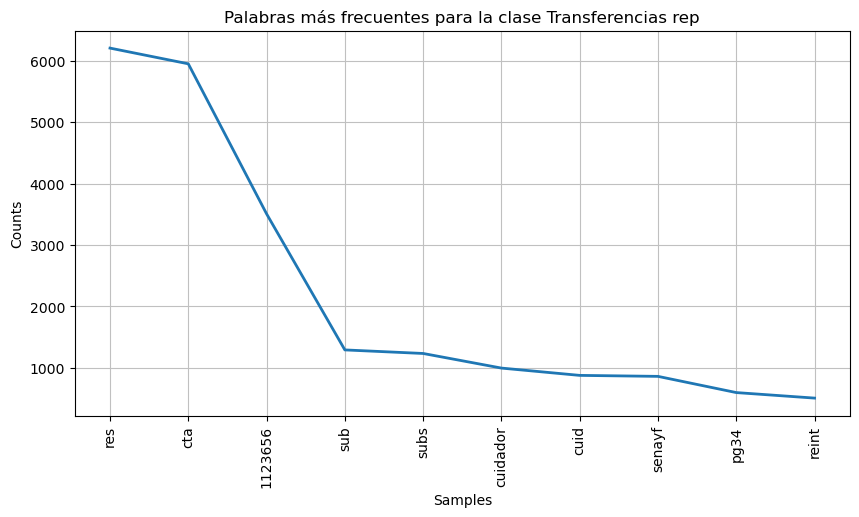

Clase: Otros
[('res', 18), ('dev', 16), ('cta', 16), ('fdos', 9), ('devolucion', 8), ('fondos', 7), ('3eros', 6), ('garantia', 6), ('devol', 5), ('10073622', 4)]


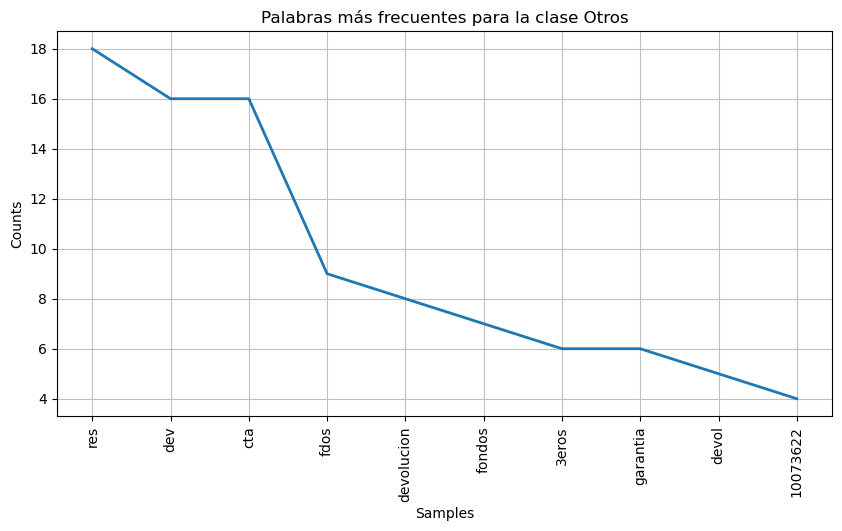

In [35]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df
# y tiene una columna "Class" con categorías y otra "descripcion" con texto

# Iterar sobre cada clase en "Class"
for class_value in df['Class'].unique():
    # Combinar el texto para la clase actual
    combined_text = ' '.join(df[df['Class'] == class_value]['Descripcion'].astype(str))
    
    # Tokenizar el texto en palabras
    tokens = word_tokenize(combined_text.lower())  # Convertir a minúsculas
    
    # Crear la distribución de frecuencias
    fdist = FreqDist(tokens)
    
    # Mostrar las 10 palabras más comunes
    print(f"Clase: {class_value}")
    print(fdist.most_common(10))
    
    # Graficar la distribución de frecuencias
    plt.figure(figsize=(10, 5))
    fdist.plot(10, cumulative=False, title=f"Palabras más frecuentes para la clase {class_value}")
    plt.show()
